# IMPORTING LIBRARIES

In [1]:
# Runtime
import timeit


# Data Manipulation
import pandas as pd
import numpy as np


# Data Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.pylab import rcParams


# Preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# ML Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from xgboost import XGBClassifier


np.warnings.filterwarnings('ignore')

In [2]:
# read and display the dataset

df = pd.read_csv('Invistico_Airline.csv')

In [3]:
df

satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129875               2                       2                 3   
129876               1                       3                 2   
129877               2                       4                 4   
129878               2                       3                 3   
129879               3                       4                 5   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                      0                 3                5            3   
1                      4                 4                2            3   
2                      3                 4                4            4   
3                      0                 1                4            1   
4                      0                 2                4            2   
...                  ...               ...              ...          ...   
129875                 3                 4                4            4   
129876                 3                 3                1            2   
129877                 3                 4                2            3   
129878                 2                 3                2            1   
129879                 5                 5                3            3

# EDA - EXPLORATORY DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
# search for any null value present on the dataset

print(df.isnull().values.any()) 
print(df.shape)

df

True
(129880, 23)


satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129875               2                       2                 3   
129876               1                       3                 2   
129877               2                       4                 4   
129878               2                       3                 3   
129879               3                       4                 5   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                      0                 3                5            3   
1                      4                 4                2            3   
2                      3                 4                4            4   
3                      0                 1                4            1   
4                      0                 2                4            2   
...                  ...               ...              ...          ...   
129875                 3                 4                4            4   
129876                 3                 3                1            2   
129877                 3                 4                2            3   
129878                 2                 3                2            1   
129879                 5                 5                3            3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
# select the object features to start using the One Hot Encoder

df_encode = df.select_dtypes(include='object') 

In [8]:
!pip install category_encoders

In [9]:
import category_encoders as ce

from category_encoders.one_hot import OneHotEncoder

In [10]:
# select the categorical features to apply the one hot encode and transform them in numerical features

one_hot_enc = OneHotEncoder(cols=['Gender',	'Customer Type',	'Type of Travel', 	'Class']) 

In [11]:
data = one_hot_enc.fit_transform(df_encode)

In [12]:
data_drop = data.drop(['satisfaction'], axis=1, inplace=True)

In [13]:
data.head()

Gender_1  Gender_2  Customer Type_1  Customer Type_2  Type of Travel_1  \
0         1         0                1                0                 1   
1         0         1                1                0                 1   
2         1         0                1                0                 1   
3         1         0                1                0                 1   
4         1         0                1                0                 1   

   Type of Travel_2  Class_1  Class_2  Class_3  
0                 0        1        0        0  
1                 0        0        1        0  
2                 0        1        0        0  
3                 0        1        0        0  
4                 0        1        0        0

In [14]:
# add the new numerical features to the original dataset

df = pd.concat([df, data], axis=1) 

In [15]:
df.head()

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Arrival Delay in Minutes  Gender_1  Gender_2  \
0               0  ...                       0.0         1         0   
1               0  ...                     305.0         0         1   
2               0  ...                       0.0         1         0   
3               0  ...                       0.0         1         0   
4               0  ...                       0.0         1         0   

   Customer Type_1  Customer Type_2  Type of Travel_1  Type of Travel_2  \
0                1                0                 1                 0   
1                1                0                 1                 0   
2                1                0                 1                 0   
3                1                0                 1                 0   
4                1                0                 1                 0   

   Class_1  Class_2  Class_3  
0        1        0        0  
1        0        1        0  
2        1        0        0  
3        1        0        0  
4        1        0        0  

[5 rows x 32 columns]

In [16]:
# drop the original categorical columns after the One Hot Encoder is done

df2 = df.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class'], axis=1, inplace=True) 

In [17]:
df

satisfaction  Age  Flight Distance  Seat comfort  \
0          satisfied   65              265             0   
1          satisfied   47             2464             0   
2          satisfied   15             2138             0   
3          satisfied   60              623             0   
4          satisfied   70              354             0   
...              ...  ...              ...           ...   
129875     satisfied   29             1731             5   
129876  dissatisfied   63             2087             2   
129877  dissatisfied   69             2320             3   
129878  dissatisfied   66             2450             3   
129879  dissatisfied   38             4307             3   

        Departure/Arrival time convenient  Food and drink  Gate location  \
0                                       0               0              2   
1                                       0               0              3   
2                                       0               0              3   
3                                       0               0              3   
4                                       0               0              3   
...                                   ...             ...            ...   
129875                                  5               5              3   
129876                                  3               2              4   
129877                                  0               3              3   
129878                                  2               3              2   
129879                                  4               3              3   

        Inflight wifi service  Inflight entertainment  Online support  ...  \
0                           2                       4               2  ...   
1                           0                       2               2  ...   
2                           2                       0               2  ...   
3                           3                       4               3  ...   
4                           4                       3               4  ...   
...                       ...                     ...             ...  ...   
129875                      2                       5               2  ...   
129876                      2                       1               1  ...   
129877                      3                       2               2  ...   
129878                      3                       2               2  ...   
129879                      3                       3               3  ...   

        Arrival Delay in Minutes  Gender_1  Gender_2  Customer Type_1  \
0                            0.0         1         0                1   
1                          305.0         0         1                1   
2                            0.0         1         0                1   
3                            0.0         1         0                1   
4                            0.0         1         0                1   
...                          ...       ...       ...              ...   
129875                       0.0         1         0                0   
129876                     172.0         0         1                0   
129877                     163.0         0         1                0   
129878                     205.0         0         1                0   
129879                     186.0         1         0                0   

        Customer Type_2  Type of Travel_1  Type of Travel_2  Class_1  Class_2  \
0                     0                 1                 0        1        0   
1                     0                 1                 0        0        1   
2                     0                 1                 0        1        0   
3                     0                 1                 0        1        0   
4                     0                 1                 0        1        0   
...                 ...               ...               ...      ...      

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Age                                129880 non-null  int64  
 2   Flight Distance                    129880 non-null  int64  
 3   Seat comfort                       129880 non-null  int64  
 4   Departure/Arrival time convenient  129880 non-null  int64  
 5   Food and drink                     129880 non-null  int64  
 6   Gate location                      129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Inflight entertainment             129880 non-null  int64  
 9   Online support                     129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  On-board service                   1298

# PLOTING IMPORTANT POINTS

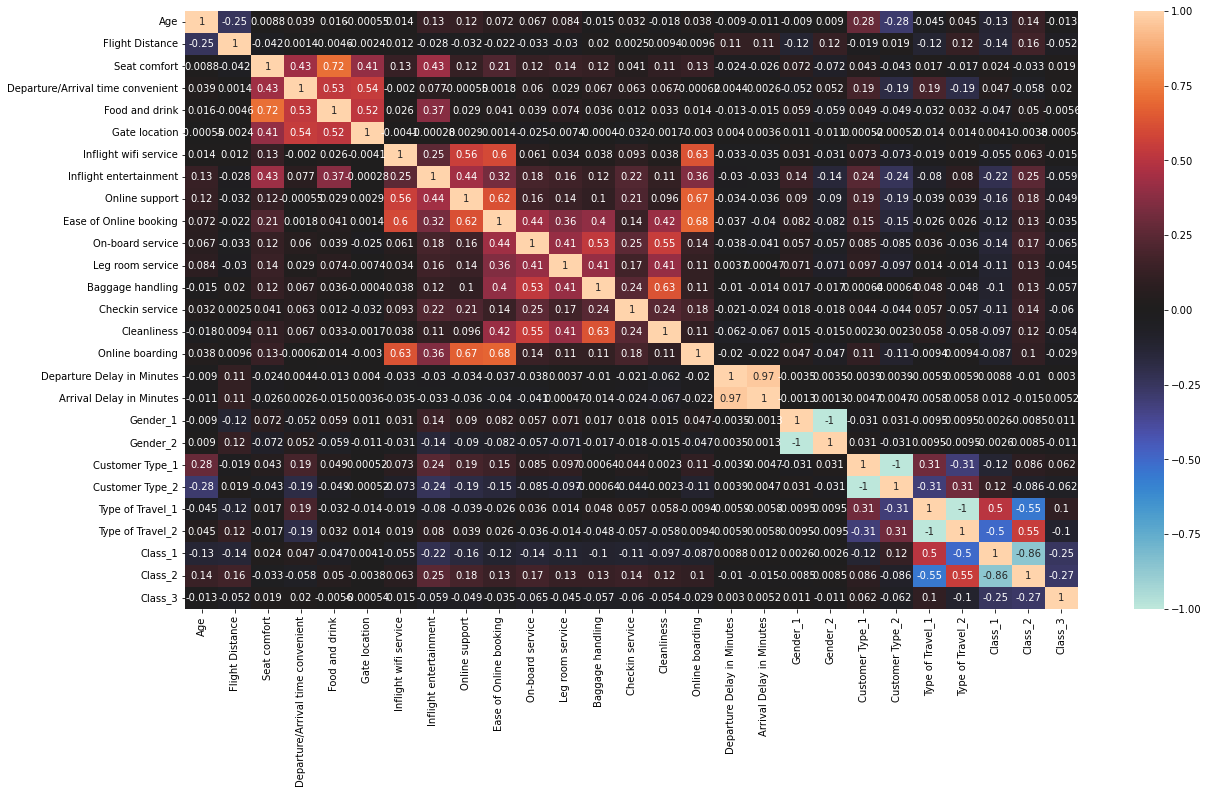

In [19]:
## Defining the size of the figure
rcParams['figure.figsize'] = 20, 11


## Correlation Matrix
correlation_matrix = df.corr()


## Heatmap
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, center=0)


## Defining position of the tricks and axis
plt.yticks(rotation=360)
plt.xticks(rotation=90)


## Ploting the figure
plt.show() 

In [20]:
# drop the feature Arrival Delay in minutes as it presents a high value of correlation with Departure Delay in Minutes

df = df.drop("Arrival Delay in Minutes",axis=1)
df

satisfaction  Age  Flight Distance  Seat comfort  \
0          satisfied   65              265             0   
1          satisfied   47             2464             0   
2          satisfied   15             2138             0   
3          satisfied   60              623             0   
4          satisfied   70              354             0   
...              ...  ...              ...           ...   
129875     satisfied   29             1731             5   
129876  dissatisfied   63             2087             2   
129877  dissatisfied   69             2320             3   
129878  dissatisfied   66             2450             3   
129879  dissatisfied   38             4307             3   

        Departure/Arrival time convenient  Food and drink  Gate location  \
0                                       0               0              2   
1                                       0               0              3   
2                                       0               0              3   
3                                       0               0              3   
4                                       0               0              3   
...                                   ...             ...            ...   
129875                                  5               5              3   
129876                                  3               2              4   
129877                                  0               3              3   
129878                                  2               3              2   
129879                                  4               3              3   

        Inflight wifi service  Inflight entertainment  Online support  ...  \
0                           2                       4               2  ...   
1                           0                       2               2  ...   
2                           2                       0               2  ...   
3                           3                       4               3  ...   
4                           4                       3               4  ...   
...                       ...                     ...             ...  ...   
129875                      2                       5               2  ...   
129876                      2                       1               1  ...   
129877                      3                       2               2  ...   
129878                      3                       2               2  ...   
129879                      3                       3               3  ...   

        Departure Delay in Minutes  Gender_1  Gender_2  Customer Type_1  \
0                                0         1         0                1   
1                              310         0         1                1   
2                                0         1         0                1   
3                                0         1         0                1   
4                                0         1         0                1   
...                            ...       ...       ...              ...   
129875                           0         1         0                0   
129876                         174         0         1                0   
129877                         155         0         1                0   
129878                         193         0         1                0   
129879                         185         1         0                0   

        Customer Type_2  Type of Travel_1  Type of Travel_2  Class_1  Class_2  \
0                     0                 1                 0        1        0   
1                     0                 1                 0        0        1   
2                     0                 1                 0        1        0   
3                     0                 1                 0        1        0   
4                     0                 1                 0        1        0   
...                 ...               ...         

In [21]:
# check the description of the dataset to see how it is going the cleaning so far

df.describe()  

Age  Flight Distance   Seat comfort  \
count  129880.000000    129880.000000  129880.000000   
mean       39.427957      1981.409055       2.838597   
std        15.119360      1027.115606       1.392983   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1925.000000       3.000000   
75%        51.000000      2544.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129880.000000   129880.000000  129880.000000   
mean                            2.990645        2.851994       2.990422   
std                             1.527224        1.443729       1.305970   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000        3.000000       3.000000   
75%                             4.000000        4.000000       4.000000   
max                             5.000000        5.000000       5.000000   

       Inflight wifi service  Inflight entertainment  Online support  \
count          129880.000000           129880.000000   129880.000000   
mean                3.249130                3.383477        3.519703   
std                 1.318818                1.346059        1.306511   
min                 0.000000                0.000000        0.000000   
25%                 2.000000                2.000000        3.000000   
50%                 3.000000                4.000000        4.000000   
75%                 4.000000                4.000000        5.000000   
max                 5.000000                5.000000        5.000000   

       Ease of Online booking  ...  Departure Delay in Minutes       Gender_1  \
count           129880.000000  ...               129880.000000  129880.000000   
mean                 3.472105  ...                   14.713713       0.507384   
std                  1.305560  ...                   38.071126       0.499947   
min                  0.000000  ...                    0.000000       0.000000   
25%                  2.000000  ...                    0.000000       0.000000   
50%                  4.000000  ...                    0.000000       1.000000   
75%                  5.000000  ...                   12.000000       1.000000   
max                  5.000000  ...                 1592.000000       1.000000   

            Gender_2  Customer Type_1  Customer Type_2  Type of Travel_1  \
count  129880.000000    129880.000000    129880.000000     129880.000000   
mean        0.492616         0.816908         0.183092          0.309416   
std         0.499947         0.386743         0.386743          0.462255   
min         0.000000         0.000000         0.000000          0.000000   
25%         0.000000         1.000000         0.000000          0.000000   
50%         0.000000         1.000000         0.000000          0.000000   
75%         1.000000         1.000000         0.000000          1.000000   
max         1.000000         1.000000         1.000000          1.000000   

       Type of Travel_2        Class_1        Class_2        Class_3  
count     129880.000000  129880.000000  129880.000000  129880.000000  
mean           0.690584       0.448945       0.478596       0.072459  
std            0.462255       0.497388       0.499544       0.259248  
min            0.000000       0.000000       0.000000       0.000000  
25%            0.000000       0.000000       0.000000       0.000000  
50%            1.000000       0.000000       0.000000       0.000000  
75%            1.000000       1.000000       1.000000       0.000000  
max            1.000000       1.000000       1.000000       1.000000  

[8 rows x 26 columns]

In [22]:
# call the info method to check the type of the features composing the dataset after part of the preparation is done

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       129880 non-null  object
 1   Age                                129880 non-null  int64 
 2   Flight Distance                    129880 non-null  int64 
 3   Seat comfort                       129880 non-null  int64 
 4   Departure/Arrival time convenient  129880 non-null  int64 
 5   Food and drink                     129880 non-null  int64 
 6   Gate location                      129880 non-null  int64 
 7   Inflight wifi service              129880 non-null  int64 
 8   Inflight entertainment             129880 non-null  int64 
 9   Online support                     129880 non-null  int64 
 10  Ease of Online booking             129880 non-null  int64 
 11  On-board service                   129880 non-null  

In [23]:
df

satisfaction  Age  Flight Distance  Seat comfort  \
0          satisfied   65              265             0   
1          satisfied   47             2464             0   
2          satisfied   15             2138             0   
3          satisfied   60              623             0   
4          satisfied   70              354             0   
...              ...  ...              ...           ...   
129875     satisfied   29             1731             5   
129876  dissatisfied   63             2087             2   
129877  dissatisfied   69             2320             3   
129878  dissatisfied   66             2450             3   
129879  dissatisfied   38             4307             3   

        Departure/Arrival time convenient  Food and drink  Gate location  \
0                                       0               0              2   
1                                       0               0              3   
2                                       0               0              3   
3                                       0               0              3   
4                                       0               0              3   
...                                   ...             ...            ...   
129875                                  5               5              3   
129876                                  3               2              4   
129877                                  0               3              3   
129878                                  2               3              2   
129879                                  4               3              3   

        Inflight wifi service  Inflight entertainment  Online support  ...  \
0                           2                       4               2  ...   
1                           0                       2               2  ...   
2                           2                       0               2  ...   
3                           3                       4               3  ...   
4                           4                       3               4  ...   
...                       ...                     ...             ...  ...   
129875                      2                       5               2  ...   
129876                      2                       1               1  ...   
129877                      3                       2               2  ...   
129878                      3                       2               2  ...   
129879                      3                       3               3  ...   

        Departure Delay in Minutes  Gender_1  Gender_2  Customer Type_1  \
0                                0         1         0                1   
1                              310         0         1                1   
2                                0         1         0                1   
3                                0         1         0                1   
4                                0         1         0                1   
...                            ...       ...       ...              ...   
129875                           0         1         0                0   
129876                         174         0         1                0   
129877                         155         0         1                0   
129878                         193         0         1                0   
129879                         185         1         0                0   

        Customer Type_2  Type of Travel_1  Type of Travel_2  Class_1  Class_2  \
0                     0                 1                 0        1        0   
1                     0                 1                 0        0        1   
2                     0                 1                 0        1        0   
3                     0                 1                 0        1        0   
4                     0                 1                 0        1        0   
...                 ...               ...         

In [24]:
## satisfaction column - label encoding

satisfaction_mapping = {"satisfied": 1, "dissatisfied": 0}
df['satisfaction'] = df['satisfaction'].map(satisfaction_mapping)

In [25]:
from sklearn import preprocessing
# apply MinMaxScaler to compress proportionally all the values between -1 and 1

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df)
modified_data = pd.DataFrame(r_scaler.transform(df), columns=df.columns)
modified_data.head()

satisfaction       Age  Flight Distance  Seat comfort  \
0           1.0  0.743590         0.031155           0.0   
1           1.0  0.512821         0.349804           0.0   
2           1.0  0.102564         0.302565           0.0   
3           1.0  0.679487         0.083031           0.0   
4           1.0  0.807692         0.044052           0.0   

   Departure/Arrival time convenient  Food and drink  Gate location  \
0                                0.0             0.0            0.4   
1                                0.0             0.0            0.6   
2                                0.0             0.0            0.6   
3                                0.0             0.0            0.6   
4                                0.0             0.0            0.6   

   Inflight wifi service  Inflight entertainment  Online support  ...  \
0                    0.4                     0.8             0.4  ...   
1                    0.0                     0.4             0.4  ...   
2                    0.4                     0.0             0.4  ...   
3                    0.6                     0.8             0.6  ...   
4                    0.8                     0.6             0.8  ...   

   Departure Delay in Minutes  Gender_1  Gender_2  Customer Type_1  \
0                    0.000000       1.0       0.0              1.0   
1                    0.194724       0.0       1.0              1.0   
2                    0.000000       1.0       0.0              1.0   
3                    0.000000       1.0       0.0              1.0   
4                    0.000000       1.0       0.0              1.0   

   Customer Type_2  Type of Travel_1  Type of Travel_2  Class_1  Class_2  \
0              0.0               1.0               0.0      1.0      0.0   
1              0.0               1.0               0.0      0.0      1.0   
2              0.0               1.0               0.0      1.0      0.0   
3              0.0               1.0               0.0      1.0      0.0   
4              0.0               1.0               0.0      1.0      0.0   

   Class_3  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 27 columns]

In [26]:
df.isna().sum()

satisfaction                         0
Age                                  0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Gender_1                             0
Gender_2                             0
Customer Type_1                      0
Customer Type_2                      0
Type of Travel_1                     0
Type of Travel_2                     0
Class_1                              0
Class_2                  

# Vizualizing the Ploting Data

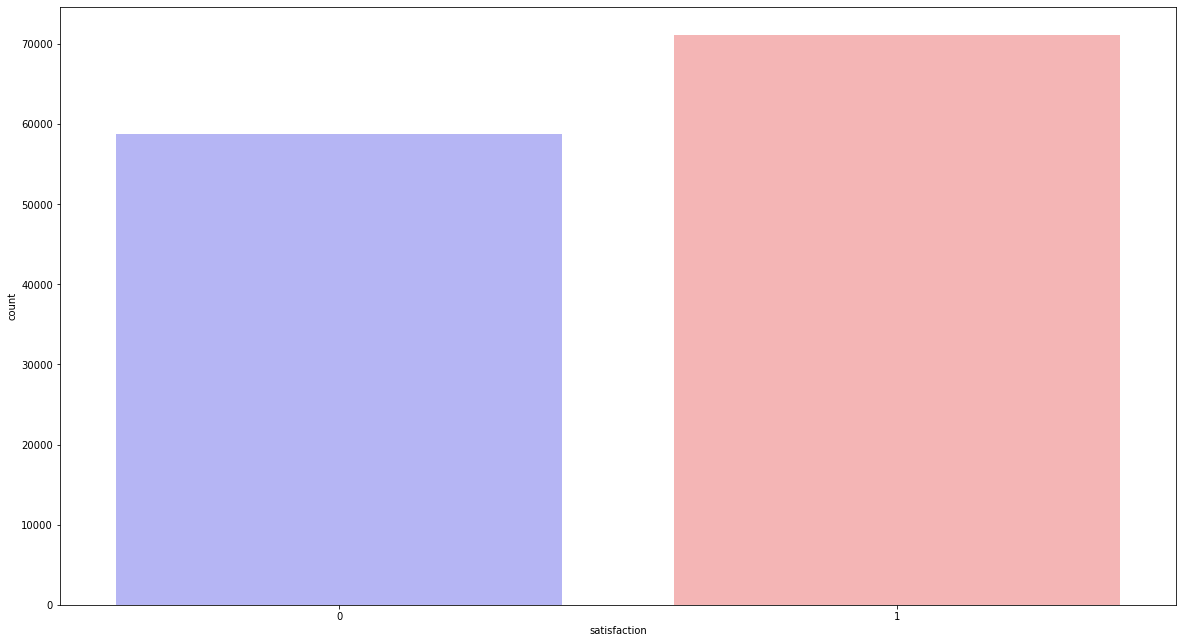

satisfaction
0    58793
1    71087
dtype: int64

In [27]:
# Graphic relation of the satisfaction column

sns.countplot(data=df, x = 'satisfaction', palette = 'bwr')
plt.show()

df.groupby('satisfaction').size()

<function matplotlib.pyplot.show(close=None, block=None)>

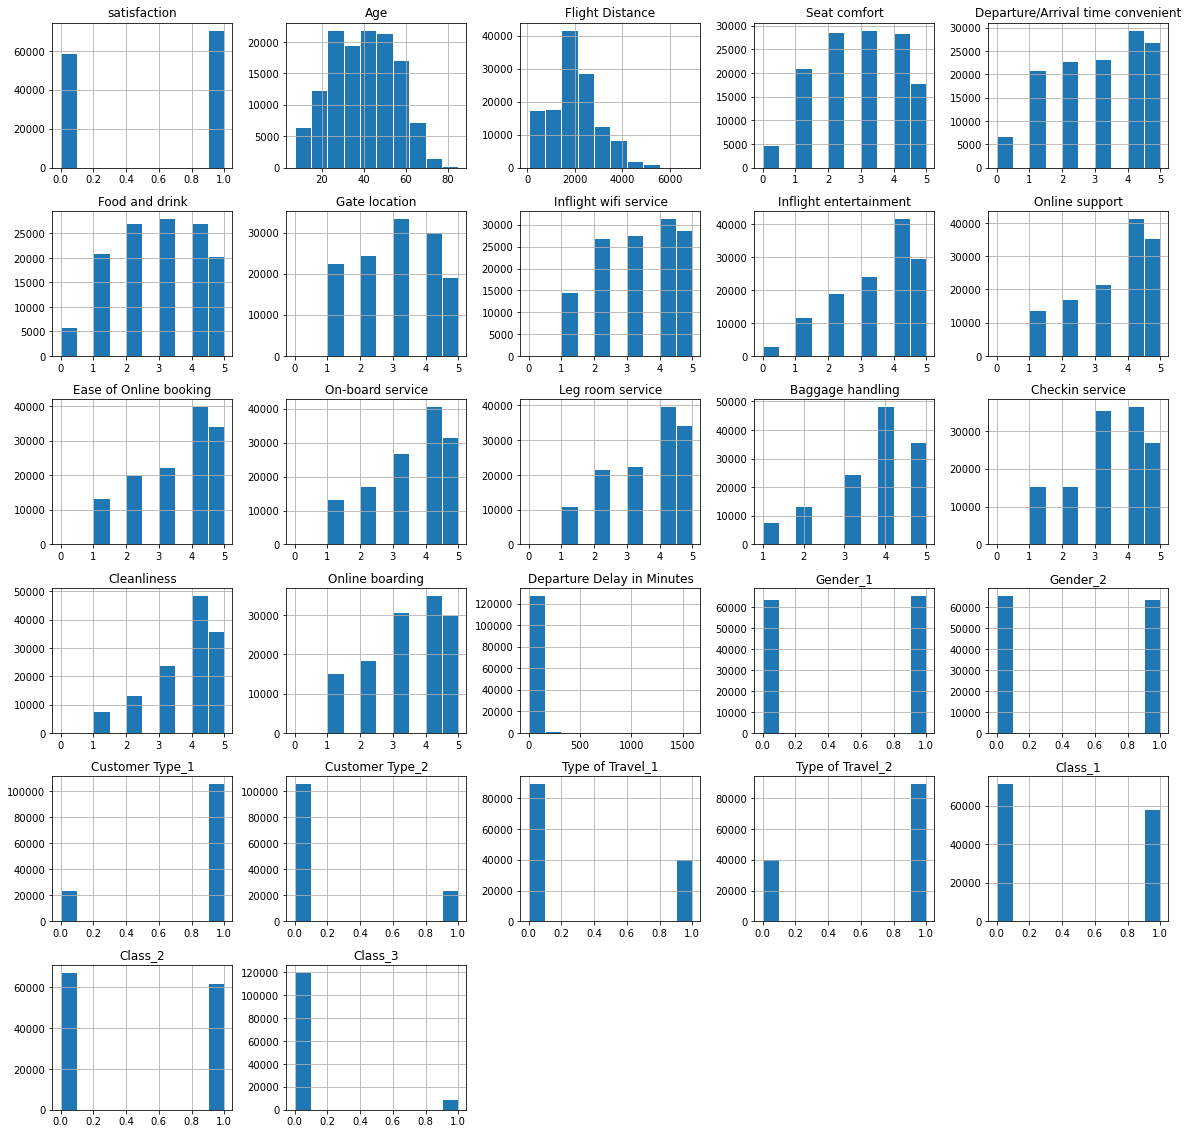

In [28]:
# plot the histogram of the features to have an idea of their variation

df.hist(figsize = (20,20), edgecolor = 'white') 
plt.show

In [29]:
# separating the features FLight Distance to plot the outliers

bins = pd.cut(df['Flight Distance'], bins = 10) 
bins = pd.DataFrame(bins)
bins.value_counts()

Flight Distance 
(1430.2, 2120.3]    41854
(2120.3, 2810.4]    28671
(740.1, 1430.2]     17651
(43.099, 740.1]     17598
(2810.4, 3500.5]    12738
(3500.5, 4190.6]     8313
(4190.6, 4880.7]     1891
(4880.7, 5570.8]      980
(5570.8, 6260.9]      135
(6260.9, 6951.0]       49
dtype: int64

Rows with outliers: 129880
Rows without outliers: 11367
information lost = 118513 rows


<AxesSubplot:>

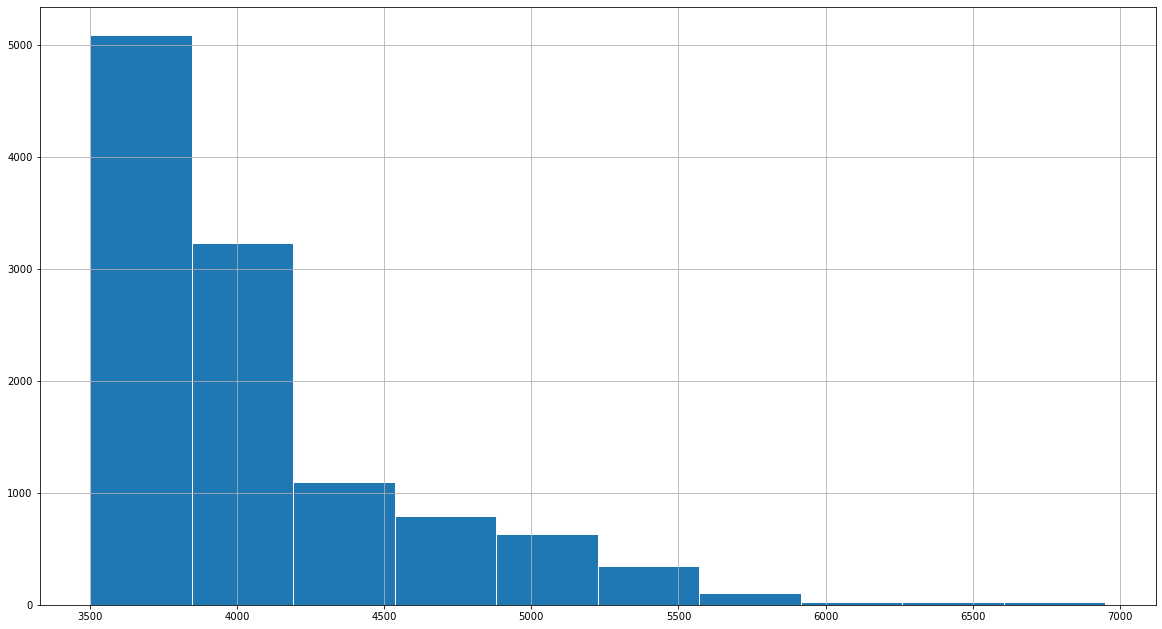

In [30]:
# Analysing outliers

lower = df['Flight Distance'] > 3500
upper = df['Flight Distance'] < 6951


close = df[lower & upper]
print('Rows with outliers: {}'.format(df.shape[0]))
print('Rows without outliers: {}'.format(close.shape[0]))
print('information lost = {} rows'.format(df.shape[0]-close.shape[0]))
close['Flight Distance'].hist(edgecolor = 'white')

Text(0.5, 1.0, 'Weight in gms')

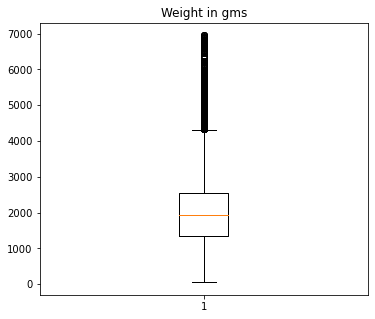

In [31]:
# ploting the outliers

plt.subplot(2, 3, 6)
plt.boxplot(df['Flight Distance'])
plt.title('Weight in gms')

<function matplotlib.pyplot.show(close=None, block=None)>

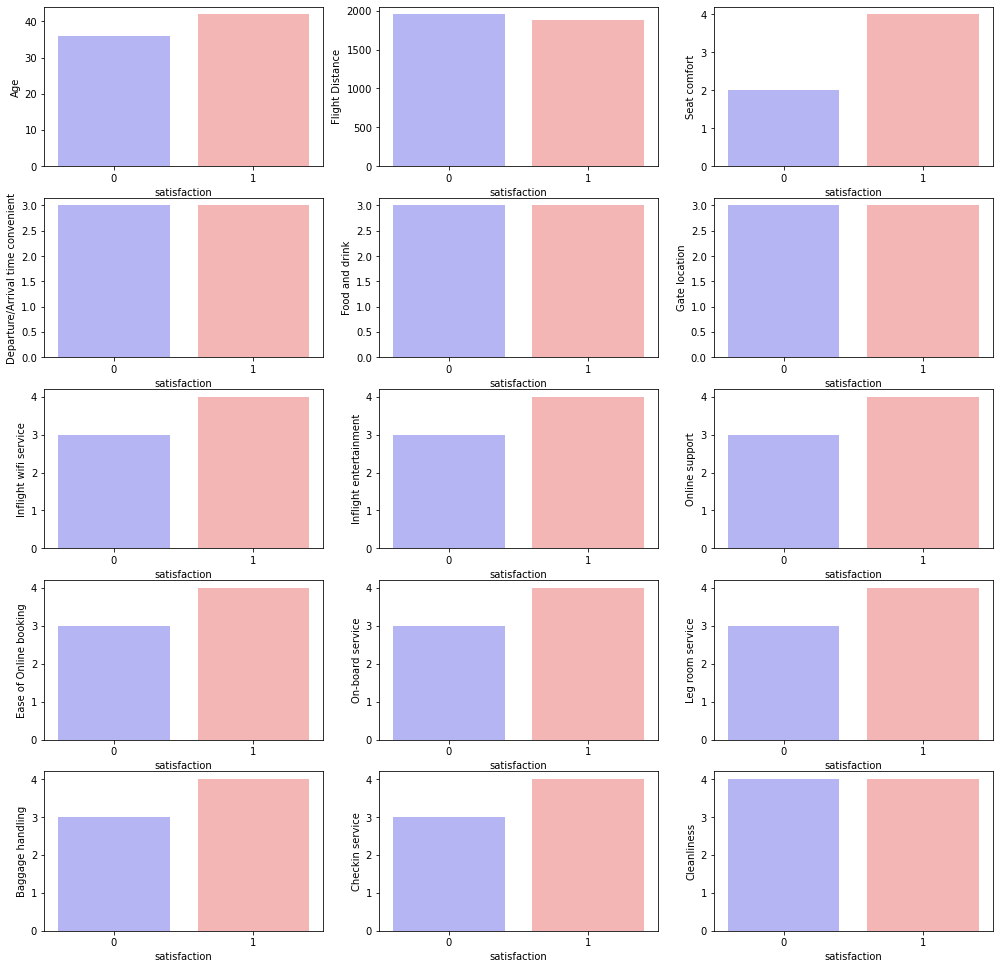

In [32]:
# vizualizing 

central = df.groupby('satisfaction').median().reset_index()
features = list(central.keys()[1:16])

fig, ax = plt.subplots(5, 3, figsize = (17,17))

ax = ax.ravel()
position = 0

for i in features:
    sns.barplot(data=central, x='satisfaction', y=i, ax=ax[position], palette='bwr')
    position += 1
    

plt.show

# **DATA PROCESSING**

In [33]:
# Training_set

X = df.iloc[:,1:].values  # All variables without the target variable
y = df.iloc[:,0].values.reshape(-1, 1) # All variables including the target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [34]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (129880, 26) (129880, 1)
Number of rows and columns after splitting dataset:  (97410, 26) (32470, 26) (97410, 1) (32470, 1)


In [35]:
!pip install lazypredict

In [36]:
# Use the lazypredict method to know the best models to apply for predicting the dependet feature

import lazypredict
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [24:38<00:00, 50.97s/it] 


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.96               0.96     0.96      0.96   
ExtraTreesClassifier               0.96               0.96     0.96      0.96   
XGBClassifier                      0.96               0.96     0.96      0.96   
LGBMClassifier                     0.96               0.96     0.96      0.96   
BaggingClassifier                  0.95               0.96     0.96      0.95   
SVC                                0.95               0.95     0.95      0.95   
DecisionTreeClassifier             0.94               0.94     0.94      0.94   
KNeighborsClassifier               0.92               0.92     0.92      0.92   
ExtraTreeClassifier                0.91               0.91     0.91      0.91   
AdaBoostClassifier                 0.90               0.90     0.90      0.90   
NuSVC                              0.88               0.88     0.88      0.88   
LinearDiscriminantAnalysis         0.84               0.83     0.83      0.84   
RidgeClassifier                    0.84               0.83     0.83      0.84   
RidgeClassifierCV                  0.84               0.83     0.83      0.84   
LinearSVC                          0.83               0.83     0.83      0.83   
LogisticRegression                 0.83               0.83     0.83      0.83   
CalibratedClassifierCV             0.83               0.83     0.83      0.83   
SGDClassifier                      0.83               0.83     0.83      0.83   
BernoulliNB                        0.82               0.82     0.82      0.82   
GaussianNB                         0.82               0.82     0.82      0.82   
NearestCentroid                    0.81               0.81     0.81      0.81   
QuadraticDiscriminantAnalysis      0.81               0.81     0.81      0.81   
Perceptron                         0.75               0.75     0.75      0.75   
PassiveAggressiveClassifier        0.69               0.69     0.69      0.69   
DummyClassifier                    0.55               0.50     0.50      0.39   

                               Time Taken  
Model                                      
RandomForestClassifier              10.42  
ExtraTreesClassifier                 9.24  
XGBClassifier                        2.50  
LGBMClassifier                       0.70  
BaggingClassifier                    4.36  
SVC                                278.56  
DecisionTreeClassifier               0.78  
KNeighborsClassifier                55.00  
ExtraTreeClassifier                  0.28  
AdaBoostClassifier                   6.13  
NuSVC                             1000.18  
LinearDiscriminantAnalysis           0.52  
RidgeClassifier                      0.22  
RidgeClassifierCV                    0.37  
LinearSVC                           23.12  
LogisticRegression                   0.38  
CalibratedClassifierCV              82.47  
SGDClassifier                        0.62  
BernoulliNB                          0.25  
GaussianNB                           0.24  
NearestCentroid                      0.18  
QuadraticDiscriminantAnalysis        0.29  
Perceptron                           0.35  
PassiveAggressiveClassifier          0.35  
DummyClassifier                      0.17

# CREATING PREDICTION MACHINES

In [37]:
# Determining optimal number of features

start = timeit.default_timer()  # It will count the time that the model will take to calculate everything from the begginning


n_features = [4, 8, 12, 16, 20, 24]

for i in n_features: # For each of the features created, select best number of features for it
    
    # Building the model based feature selection
    
    
    select_rfe = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select = i)
    
    select_rfe.fit(X_train, y_train)     # It will be selected the number of features to train
    
    mask_rfe = select_rfe.get_support()
    
    X_train_rfe = select_rfe.transform(X_train)    # Now the RFE will train the selected n of features to create the train and test 
    X_test_rfe = select_rfe.transform(X_test)
    
    
    # The score of the model will be requested now to have the results of the train and test of the model

    score_rfe = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
    
    
    print('Test score: {:.3f}'.format(score_rfe), " number of features: {}".format(i))
          

stop = timeit.default_timer()   # It will stop the timer given by timeit to count the model calculating time
print('Time: ', stop - start)   # Display the time in seconds that the model took to do all the work 

Test score: 0.847  number of features: 4
Test score: 0.909  number of features: 8
Test score: 0.934  number of features: 12
Test score: 0.951  number of features: 16
Test score: 0.959  number of features: 20
Test score: 0.959  number of features: 24
Time:  710.3269051


In [38]:
# Recursive elimination for choosing and working only with the best features

select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select = 16)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print('Test score: {:.3f}'.format(score), ' number of features: {}'.format(16))

features = pd.DataFrame({'features':list(df.iloc[:,1:].keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features.append('satisfaction')

Test score: 0.952  number of features: 16


In [39]:
# The main features

df = df[features]
df

Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0        65              265             0                                  0   
1        47             2464             0                                  0   
2        15             2138             0                                  0   
3        60              623             0                                  0   
4        70              354             0                                  0   
...     ...              ...           ...                                ...   
129875   29             1731             5                                  5   
129876   63             2087             2                                  3   
129877   69             2320             3                                  0   
129878   66             2450             3                                  2   
129879   38             4307             3                                  4   

        Food and drink  Inflight entertainment  Online support  \
0                    0                       4               2   
1                    0                       2               2   
2                    0                       0               2   
3                    0                       4               3   
4                    0                       3               4   
...                ...                     ...             ...   
129875               5                       5               2   
129876               2                       1               1   
129877               3                       2               2   
129878               3                       2               2   
129879               3                       3               3   

        Ease of Online booking  On-board service  Leg room service  \
0                            3                 3                 0   
1                            3                 4                 4   
2                            2                 3                 3   
3                            1                 1                 0   
4                            2                 2                 0   
...                        ...               ...               ...   
129875                       2                 3                 3   
129876                       3                 2                 3   
129877                       4                 4                 3   
129878                       3                 3                 2   
129879                       4                 5                 5   

        Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                      3                5            3                2   
1                      4                2            3                2   
2                      4                4            4                2   
3                      1                4            1                3   
4                      2                4            2                5   
...                  ...              ...          ...              ...   
129875                 4                4            4                2   
129876                 3                1            2                1   
129877                 4                2            3                2   
129878                 3                2            1                2   
129879                 5                3            3                3   

        Customer Type_2  Class_2  satisfaction  
0                     0        0             1  
1                     0        1             1  
2                     0        0             1  
3                     0        0             1  
4                     0        0             1  
...                 ...      ...           ...  
129875                1        0             1  
129876                1        1             0  
129877                1        0             0  
129878    

In [40]:
# Training_set

X = df.iloc[:,0:-1].values  # All variables without the target variable
y = df.iloc[:,-1].values.reshape(-1, 1) # All variables including the target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [41]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (129880, 16) (129880, 1)
Number of rows and columns after splitting dataset:  (97410, 16) (32470, 16) (97410, 1) (32470, 1)


# Random Forest Classifier

In [42]:
forest = RandomForestClassifier()
forest.fit(X_train_rfe, y_train)
score1 = forest.score(X_test_rfe, y_test)

In [43]:
forest_predict = forest.predict(X_test_rfe)

Text(0.5, 0, 'Random Forest Feature Importance')

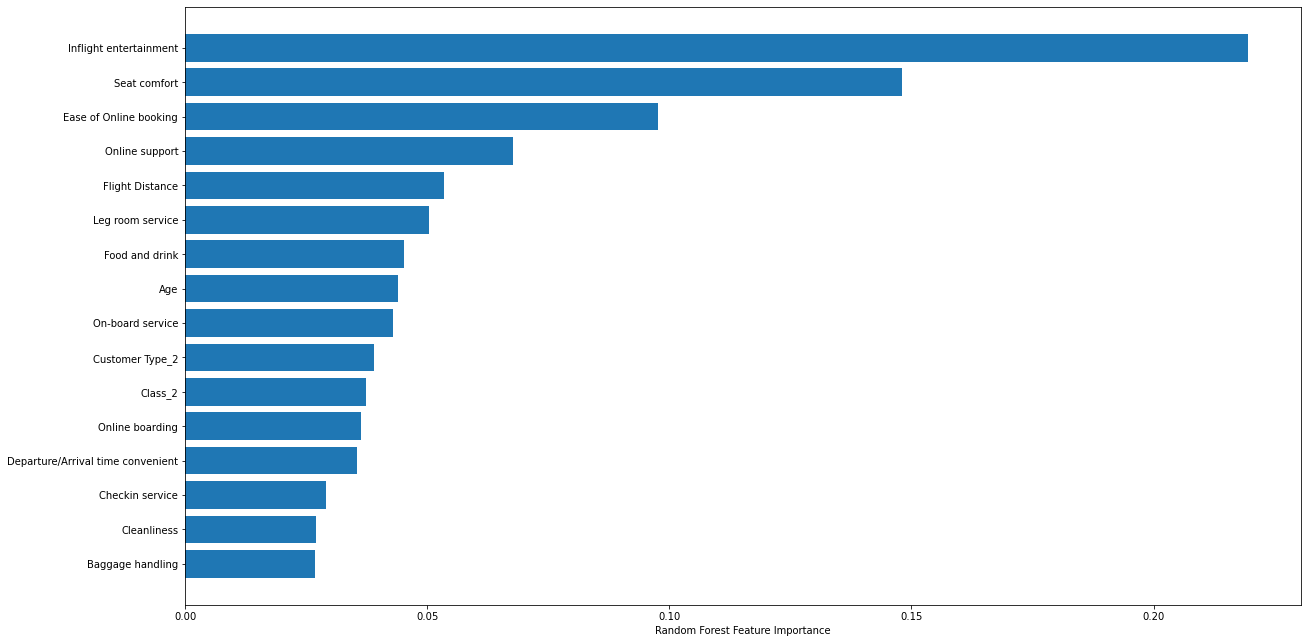

In [44]:
# Apply Random Fores Classifier model and plot the graph of the best features found

importances = forest.feature_importances_

sorted_idx = importances.argsort()

plt.barh(df.columns[:-1][sorted_idx], importances[sorted_idx])

plt.xlabel("Random Forest Feature Importance")

In [45]:
print(f'{score1 * 100 :.2f}%')

95.18%


# Extra Trees Classifier

In [46]:
# Apply Extra Trees Classifier model and plot the graph of the best features found

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification



clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_rfe, y_train)

clf.score(X_test_rfe, y_test)

0.9510317215891593

Text(0.5, 0, 'Extra Trees Classifier Feature Importance')

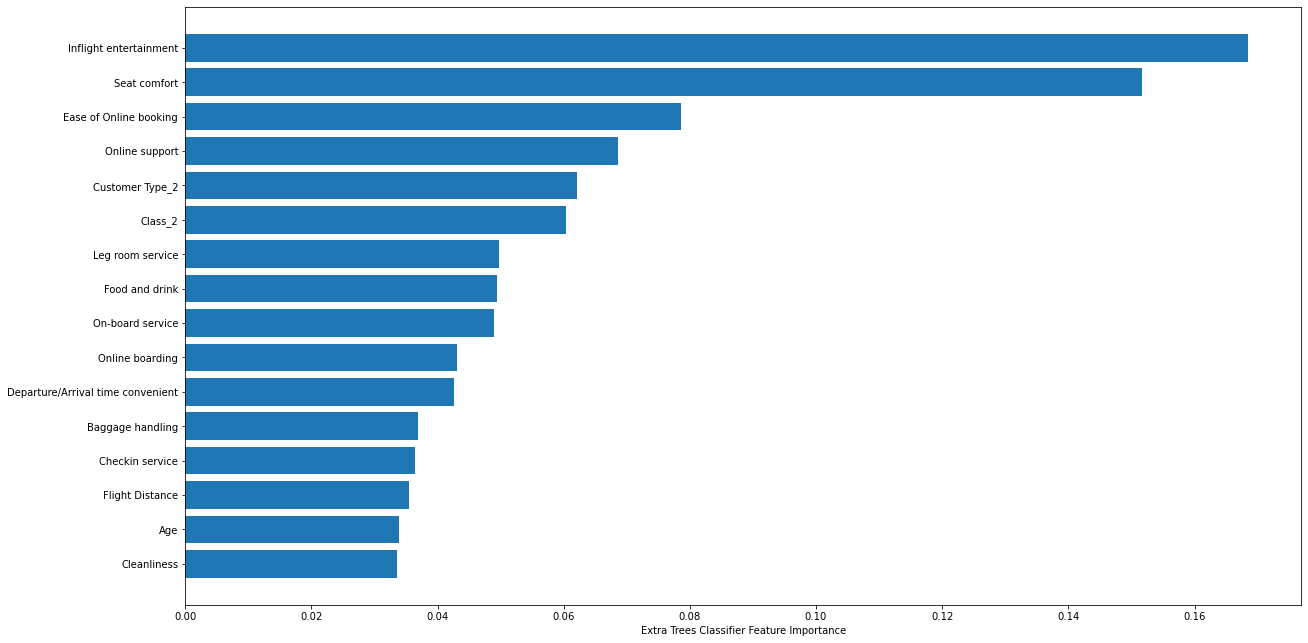

In [47]:
sorted_idx = clf.feature_importances_.argsort()

plt.barh(df.columns[:-1][sorted_idx], clf.feature_importances_[sorted_idx])

plt.xlabel("Extra Trees Classifier Feature Importance")

In [48]:
clf = ExtraTreesClassifier()
clf.fit(X_train_rfe, y_train)
score2 = clf.score(X_test_rfe, y_test)

print(score2)

0.9506005543578688


In [49]:
clf_predict = clf.predict(X_test_rfe)

In [50]:
print(f'{score2 * 100 :.2f}%')

95.06%


# XGB Classifier

In [51]:
# Apply XGB Classifier model

bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')


bst.fit(X_train_rfe, y_train)

bst.score(X_test_rfe, y_test)

0.8570372651678473

[0.         0.         0.26118776 0.         0.         0.5673885
 0.         0.1714237  0.         0.         0.         0.
 0.         0.         0.         0.        ]


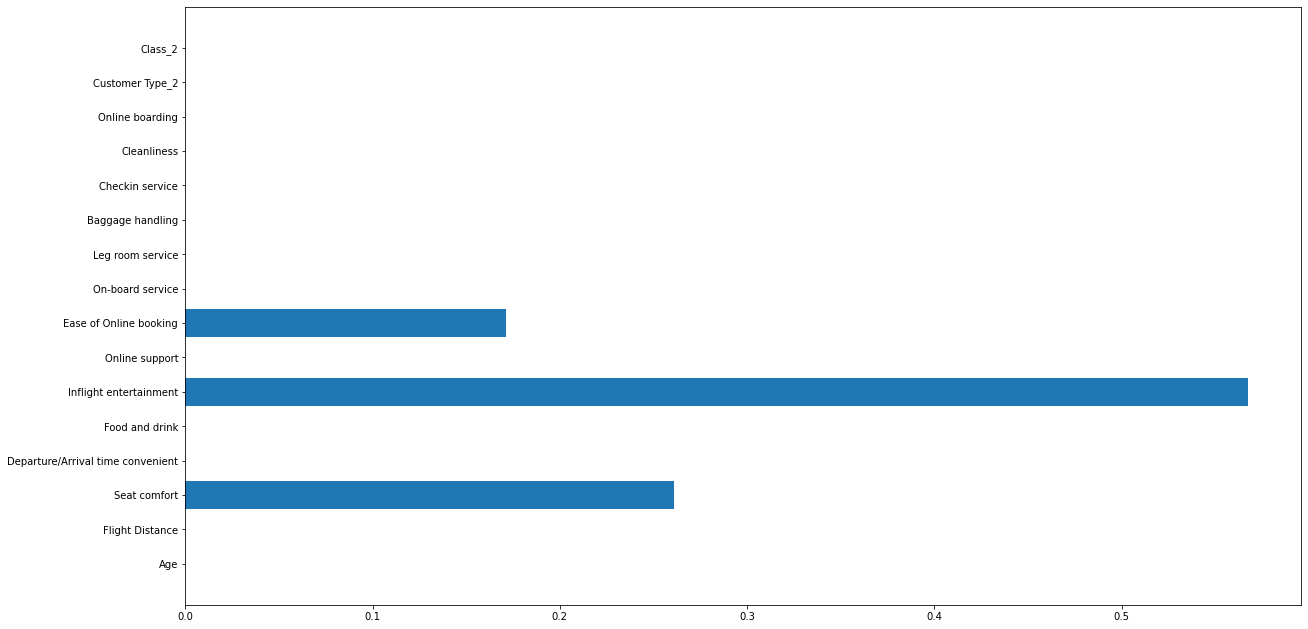

In [52]:
# feature importance

print(bst.feature_importances_)

# plot
plt.barh(df.columns[:-1], bst.feature_importances_)
plt.show()

In [53]:
bst = XGBClassifier()
bst.fit(X_train_rfe, y_train)
score3 = bst.score(X_test_rfe, y_test)

print(score3)

0.9495226362796427


In [54]:
bst_predict = bst.predict(X_test_rfe)

In [55]:
print(f'{score3 * 100 :.2f}%')

94.95%


According to the models, it was possible to see what are the most important features to predict the customer's satisfaction as dependent feature.
In level of importance, they are respectively:

1 - Inflight Entertainment
2 - Seat Comfort
3 - Ease of Online Booking
4 - Online Support


# MACHINE EVALUATION - CROSS VALIDATION

In [56]:
# Training_set

X = df.iloc[:,0:-1].values  # All variables without the target variable
y = df.iloc[:,16].values.reshape(-1, 1) # All variables including the target variable


# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


X_new = SelectKBest(chi2, k=16)
X_new_algo = X_new.fit_transform(X, y)


df.columns[:-1][X_new.get_support()]

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding', 'Customer Type_2',
       'Class_2'],
      dtype='object')

In [57]:
score_list_forest = []

In [58]:
# Cross Validation of Random Forest Classifier with 5%, 10%%, 15% and 20%


for i in [20, 10, 7, 5]:
    
    kf = KFold(n_splits = i, random_state = 42, shuffle = True)


    forest = RandomForestClassifier()


    scores_forest = cross_val_score(forest, X, y, cv=kf)


    score_list_forest.append({i:scores_forest, 'mean': scores_forest.mean()})
    
    print(scores_forest.mean())

0.9523406221127194
0.9520711425931628
0.9517631593314722
0.9508777332922698


In [59]:
score_list_clf = []

In [60]:
# Cross Validation of Extra Tree Classifier with 5%, 10%%, 15% and 20%


for i in [20, 10, 7, 5]:
    
    kf = KFold(n_splits = i, random_state = 42, shuffle = True)


    clf = ExtraTreesClassifier()


    scores_clf = cross_val_score(clf, X, y, cv=kf)


    score_list_clf.append({i:scores_clf, 'mean': scores_clf.mean()})
    
    
    print(scores_clf.mean())

0.9526485987064983
0.9514089929165384
0.9512088099393271
0.9509470280258701


In [61]:
score_list_bst = []

In [62]:
# Cross Validation of XGB Classifier with 5%, 10%%, 15% and 20%


for i in [20, 10, 7, 5]:
    
    kf = KFold(n_splits = i, random_state = 42, shuffle = True)


    bst = XGBClassifier()


    scores_bst = cross_val_score(bst, X, y, cv=kf)


    score_list_bst.append({i:scores_bst, 'mean': scores_bst.mean()})
    
    
    print(scores_bst.mean())

0.9505004619648908
0.9498383122882661
0.949869108139538
0.949692023406221


# Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

[[13961   647]
 [  918 16944]]


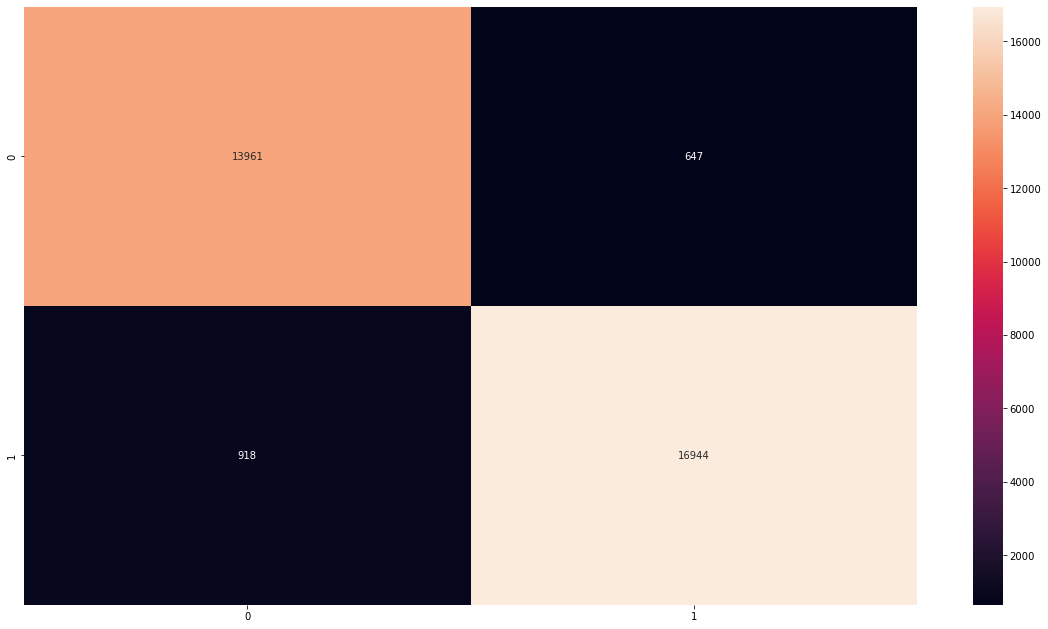

In [64]:
# Calculate cm by calling a method named as 'confusion_matrix' of the model forest results
cm = confusion_matrix(y_test, forest_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, fmt='g', annot = True)
print(cm)

[[13920   688]
 [  916 16946]]


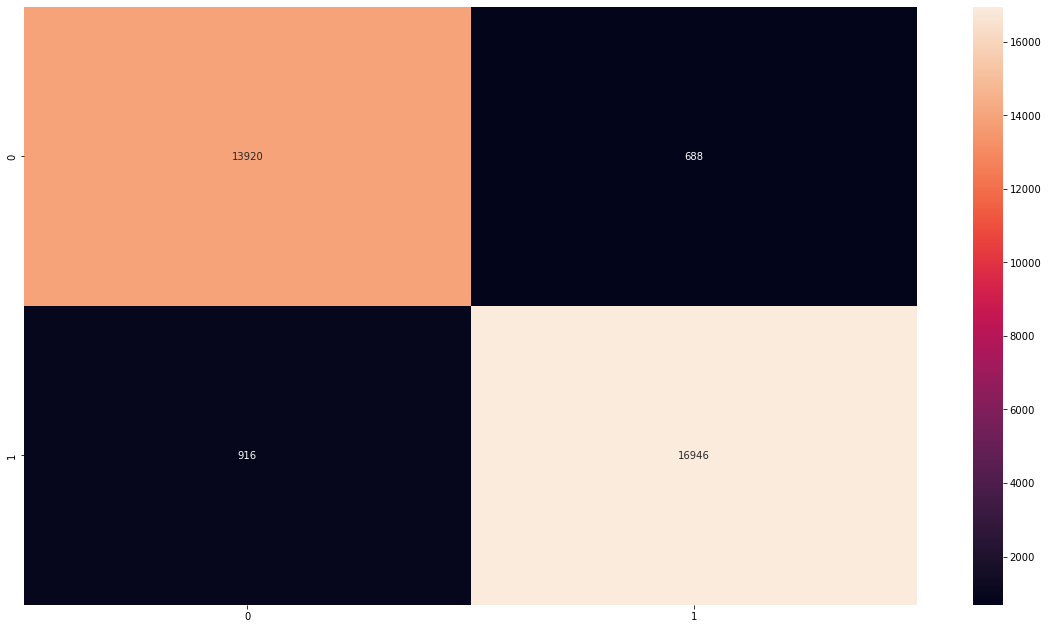

In [65]:
# Calculate cm by calling a method named as 'confusion_matrix' of the clf model results
cm = confusion_matrix(y_test, clf_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, fmt='g', annot = True)
print(cm)

[[13891   717]
 [  922 16940]]


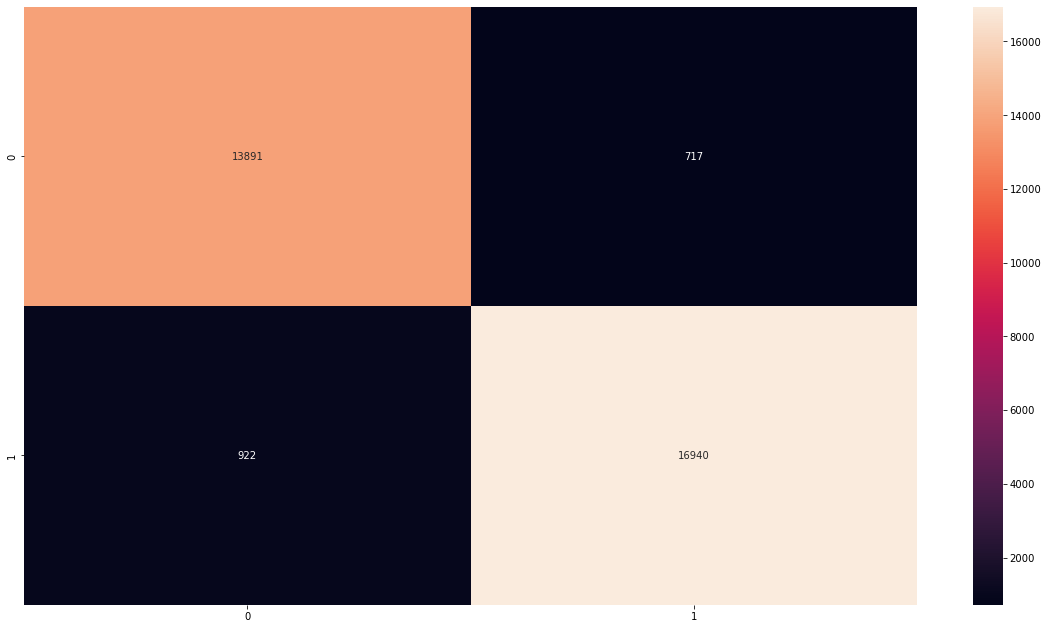

In [66]:
# Calculate cm by calling a method named as 'confusion_matrix' of the bst results
cm = confusion_matrix(y_test, bst_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, fmt='g', annot = True)
print(cm)